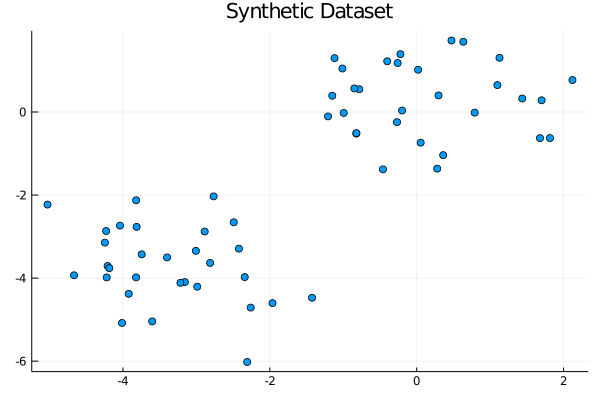

In [1]:
using Distributions, StatsPlots, Random

# Set a random seed.
Random.seed!(3)

# Construct 30 data points for each cluster.
N = 30

# Parameters for each cluster, we assume that each cluster is Gaussian distributed in the example.
μs = [-3.5, 0.0]

# Construct the data points.
x = mapreduce(c -> rand(MvNormal([μs[c], μs[c]], 1.), N), hcat, 1:2)

# Visualization.
scatter(x[1,:], x[2,:], legend = false, title = "Synthetic Dataset")


In [2]:
using Turing, MCMCChains

# Turn off the progress monitor.
# Turing.turnprogress(false)

@model GaussianMixtureModel(x) = begin
    
    D, N = size(x)

    # Draw the parameters for cluster 1.
    μ1 ~ Normal()
    
    # Draw the parameters for cluster 2.
    μ2 ~ Normal()
    
    μ = [μ1, μ2]
    
    # Uncomment the following lines to draw the weights for the K clusters 
    # from a Dirichlet distribution.
    
    # α = 1.0
    # w ~ Dirichlet(2, α)
    
    # Comment out this line if you instead want to draw the weights.
    w = [0.5, 0.5]
    
    # Draw assignments for each datum and generate it from a multivariate normal.
    k = Vector{Int}(undef, N)
    for i in 1:N
        k[i] ~ Categorical(w)
        x[:,i] ~ MvNormal([μ[k[i]], μ[k[i]]], 1.)
    end
    return k
end

DynamicPPL.ModelGen{var"###generator#274",(:x,),(),Tuple{}}(##generator#274, NamedTuple())

Sampling: 100%|█████████████████████████████████████████| Time: 0:02:15


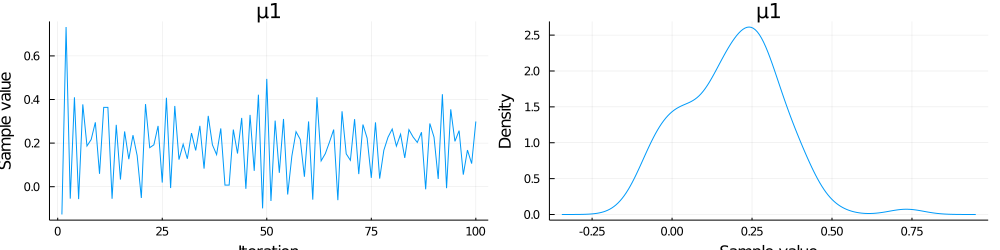

In [4]:
gmm_model = GaussianMixtureModel(x);
gmm_sampler = Gibbs(PG(100, :k), HMC(0.05, 10, :μ1, :μ2))
chain = sample(gmm_model, gmm_sampler, 100)

In [8]:
advi = ADVI(10, 1000)
q = vi(gmm_model, advi);

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4772153638567739324
└ @ Turing.Variational /home/ritesh/.julia/packages/Turing/GMBTf/src/variational/VariationalInference.jl:204


LoadError: InexactError: Int64(0.0362015404859386)